##Plan
1. A Base global Model--> Captures housing price trends

2. Local City-specific models--> capture regional differences in housing dynamics

Benefits and Why it Matters
* Segmented modeling: Housing prices behave differently across cities (coast vs inland, big vs small)

* Personalized insights: Explain why one model works better a city vs another city

* Benchmarking: can compare global vs. local performance (R2-score in each city)

##"California Housing Analysis: County-wise Insights for Kaggle"
https://www.kaggle.com/datasets/abdallahsamman/california-housing-with-name-of-counties

Download the file(zip) from my Coputer Device

In [1]:
from google.colab import files
uploaded = files.upload()

Saving California_Housing_CitiesAdded.csv.zip to California_Housing_CitiesAdded.csv.zip


# Unzip it

In [2]:
import zipfile
with zipfile.ZipFile("California_Housing_CitiesAdded.csv.zip", 'r') as zip_ref:
  zip_ref.extractall("housing_data")

In [3]:
import os
os.listdir("housing_data")

['California_Housing_CitiesAdded.csv']

Load data

In [4]:
import pandas as pd
df = pd.read_csv("/content/California_Housing_CitiesAdded.csv.zip")
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,ocean_proximity,City
0,500001.0,1.2434,52,249,78,396,85,37.80,-122.27,2524.614616,552234.0515,731023.5749,61415.35211,14466.70538,NEAR BAY,Alameda
1,500001.0,1.1696,52,609,236,1349,250,37.87,-122.25,7897.024567,556856.9280,735788.3723,67242.51828,19172.81885,NEAR BAY,Alameda
2,500001.0,7.8521,52,1668,225,517,214,37.86,-122.24,9154.528309,555442.5086,734372.6023,65849.13943,19335.74118,NEAR BAY,Alameda
3,500001.0,9.3959,52,3726,474,1366,496,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745,NEAR BAY,Alameda
4,500001.0,7.8772,52,2990,379,947,361,37.83,-122.23,7284.913015,552365.4712,731263.5682,62493.11252,18750.94628,NEAR BAY,Alameda


In [5]:
print("Shape", df.shape)
print("\nInfo")
print(df.info())
print("\nMissing Values", df.isnull().sum())

Shape (20640, 16)

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-n

In [6]:
df['City'].value_counts().head(10)

,count
City,
Los Angeles,5836
Orange,1620
San Diego,1590
Alameda,1018
Santa Clara,1011
San Bernardino,827
Sacramento,702
Riverside,620
Contra Costa,593


## Modeling Top 10 Cities

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Get top 10 cities
top_10_cities = df['City'].value_counts().head(10).index.tolist()
results = []

for city in top_10_cities:
  city_df = df[df['City'] == city].copy()
  city_df.drop(columns=['City', 'Tot_Rooms', 'Tot_Bedrooms'], inplace=True)
  city_df = pd.get_dummies(city_df, columns=['ocean_proximity'], drop_first = True)

  X = city_df.drop(columns=['Median_House_Value'])
  y = city_df['Median_House_Value']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  results.append({
      'City': city,
      'R2 Score': r2_score(y_test, y_pred),
      'MAE': mean_absolute_error(y_test, y_pred),
      'MSE': mean_squared_error(y_test, y_pred)
  })

pd.DataFrame(results)


,City,R2 Score,MAE,MSE
0,Los Angeles,0.660454,51246.696157,4.795870e+09
1,Orange,0.575745,47150.573068,4.105047e+09
2,San Diego,0.619545,41957.409193,3.390368e+09
3,Alameda,0.670371,35175.091963,2.547804e+09
4,Santa Clara,0.696191,43066.218470,3.087702e+09
5,San Bernardino,0.574837,25919.019325,1.911455e+09
6,Sacramento,0.651936,25869.810551,1.262574e+09
7,Riverside,0.585412,31708.651623,2.273151e+09
8,Contra Costa,0.863153,30467.790117,1.655598e+09
9,San Francisco,0.616031,46323.722524,4.617185e+09


/tmp/ipython-input-8-546796651.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='R2 Score', data=results_df, palette='Blues_d')


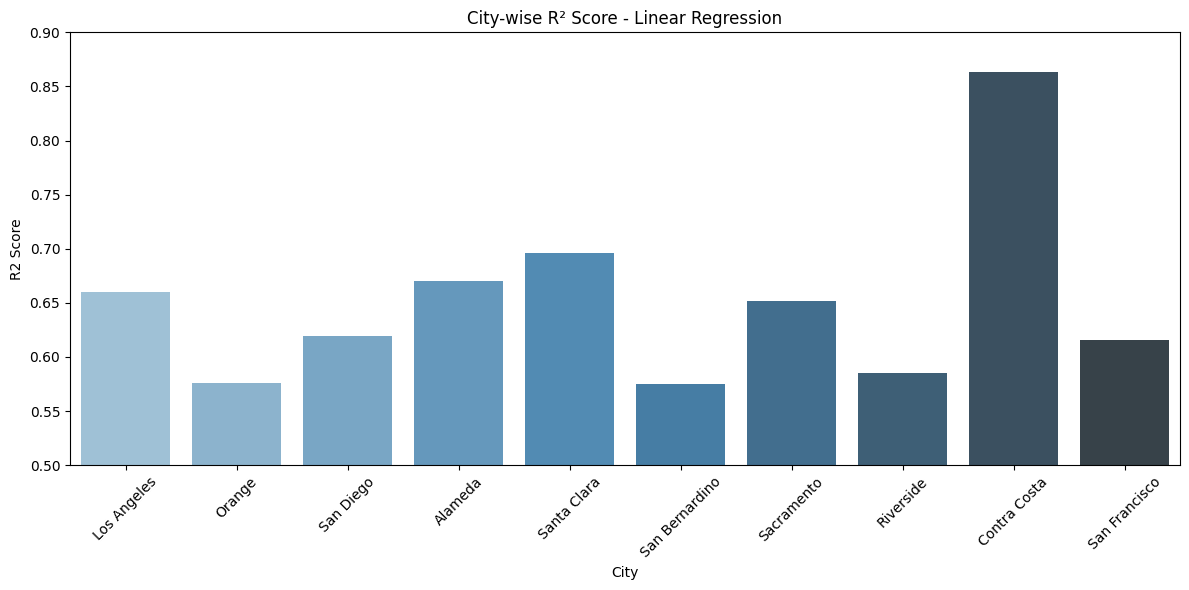

/tmp/ipython-input-8-546796651.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='MAE', data=results_df, palette='Reds_d')


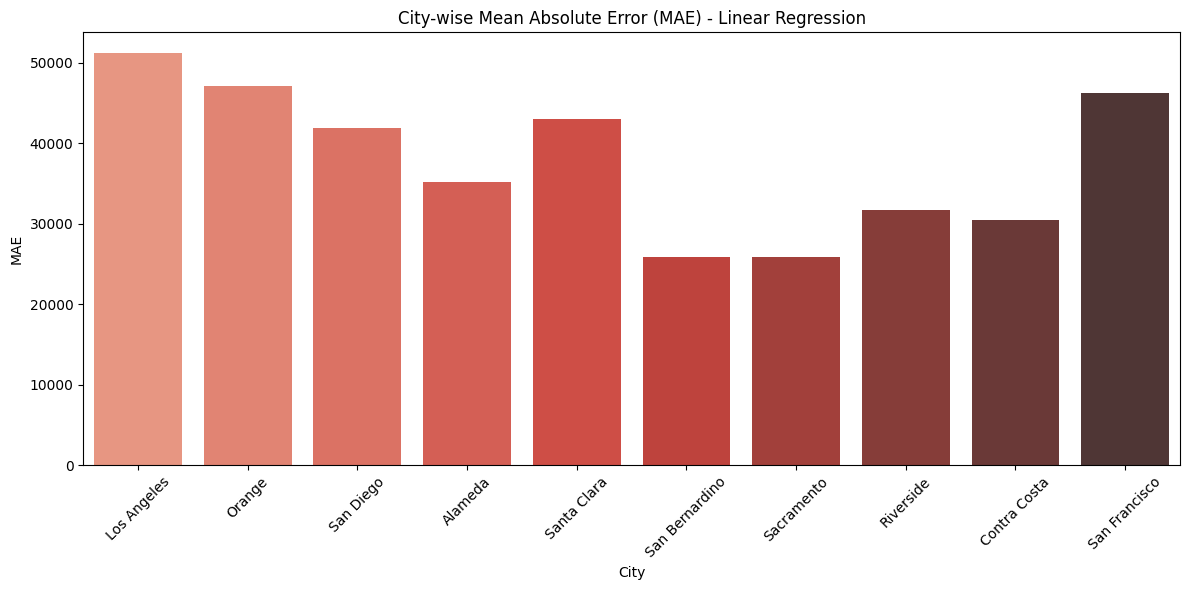

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# City-wise Linear Regression results
results_df = pd.DataFrame({
    'City': ['Los Angeles', 'Orange', 'San Diego', 'Alameda', 'Santa Clara',
             'San Bernardino', 'Sacramento', 'Riverside', 'Contra Costa', 'San Francisco'],
    'R2 Score': [0.660454, 0.575745, 0.619545, 0.670371, 0.696191,
                 0.574837, 0.651936, 0.585412, 0.863153, 0.616031],
    'MAE': [51246.70, 47150.57, 41957.41, 35175.09, 43066.22,
            25919.02, 25869.81, 31708.65, 30467.79, 46323.72]
})

# === Plot 1: R² Score ===
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='R2 Score', data=results_df, palette='Blues_d')
plt.xticks(rotation=45)
plt.title("City-wise R² Score - Linear Regression")
plt.ylim(0.5, 0.9)
plt.tight_layout()
plt.savefig("city_r2_scores.png")  # Save the plot
plt.show()

# === Plot 2: MAE ===
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='MAE', data=results_df, palette='Reds_d')
plt.xticks(rotation=45)
plt.title("City-wise Mean Absolute Error (MAE) - Linear Regression")
plt.tight_layout()
plt.savefig("city_mae_scores.png")  # Save the plot
plt.show()


In [9]:
#Downloaded once or after changed
# from google.colab import files
# files.download("city_r2_scores.png")
# files.download("city_mae_scores.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Random Forest & GXBoost City-wise Modeling

In [10]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,ocean_proximity,City
0,500001.0,1.2434,52,249,78,396,85,37.80,-122.27,2524.614616,552234.0515,731023.5749,61415.35211,14466.70538,NEAR BAY,Alameda
1,500001.0,1.1696,52,609,236,1349,250,37.87,-122.25,7897.024567,556856.9280,735788.3723,67242.51828,19172.81885,NEAR BAY,Alameda
2,500001.0,7.8521,52,1668,225,517,214,37.86,-122.24,9154.528309,555442.5086,734372.6023,65849.13943,19335.74118,NEAR BAY,Alameda
3,500001.0,9.3959,52,3726,474,1366,496,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745,NEAR BAY,Alameda
4,500001.0,7.8772,52,2990,379,947,361,37.83,-122.23,7284.913015,552365.4712,731263.5682,62493.11252,18750.94628,NEAR BAY,Alameda


In [15]:
top_10_cities

['Los Angeles',
 'Orange',
 'San Diego',
 'Alameda',
 'Santa Clara',
 'San Bernardino',
 'Sacramento',
 'Riverside',
 'Contra Costa',
 'San Francisco']

In [17]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

# Top 10 cities
top_10_cities = ['Los Angeles', 'Orange', 'San Diego', 'Alameda', 'Santa Clara',
                 'San Bernardino', 'Sacramento', 'Riverside', 'Contra Costa', 'San Francisco']

results = []

for city in top_10_cities:
    df_city = df[df['City'] == city].copy()

    # One-hot encode 'ocean_proximity' (fixes the error)
    df_city = pd.get_dummies(df_city, columns=['ocean_proximity'], drop_first=True)

    # Drop 'City' from features
    X = df_city.drop(columns=['Median_House_Value', 'City'])
    y = df_city['Median_House_Value']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

    # --- Random Forest ---
    rf = RandomForestRegressor(random_state=50)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    results.append({
        'City': city,
        'Model': 'Random Forest',
        'R2 Score': r2_score(y_test, y_pred_rf),
        'MAE': mean_absolute_error(y_test, y_pred_rf),
        'MSE': mean_squared_error(y_test, y_pred_rf)
    })

    # --- XGBoost ---
    xgb = XGBRegressor(random_state=50, verbosity=0)
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)

    results.append({
        'City': city,
        'Model': 'XGBoost',
        'R2 Score': r2_score(y_test, y_pred_xgb),
        'MAE': mean_absolute_error(y_test, y_pred_xgb),
        'MSE': mean_squared_error(y_test, y_pred_xgb)
    })

# Final results DataFrame
results_df = pd.DataFrame(results)
results_df

,City,Model,R2 Score,MAE,MSE
0,Los Angeles,Random Forest,0.836984,29276.007072,2.134567e+09
1,Los Angeles,XGBoost,0.845188,29316.479753,2.027148e+09
2,Orange,Random Forest,0.705764,36973.378426,3.306197e+09
3,Orange,XGBoost,0.703752,38069.356891,3.328806e+09
4,San Diego,Random Forest,0.798701,30375.460031,2.136559e+09
5,San Diego,XGBoost,0.768592,32208.707793,2.456132e+09
6,Alameda,Random Forest,0.854205,23743.805147,1.271350e+09
7,Alameda,XGBoost,0.842578,25596.710555,1.372737e+09
8,Santa Clara,Random Forest,0.761948,35454.584483,2.380174e+09
9,Santa Clara,XGBoost,0.757956,35066.997922,2.420091e+09


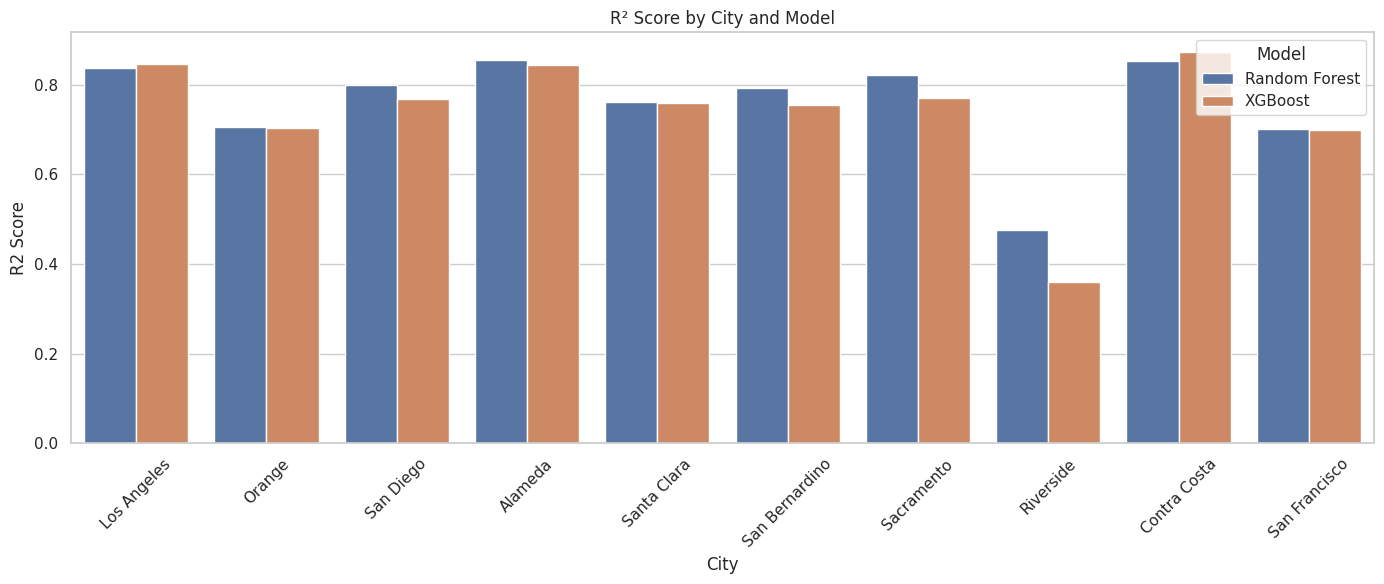

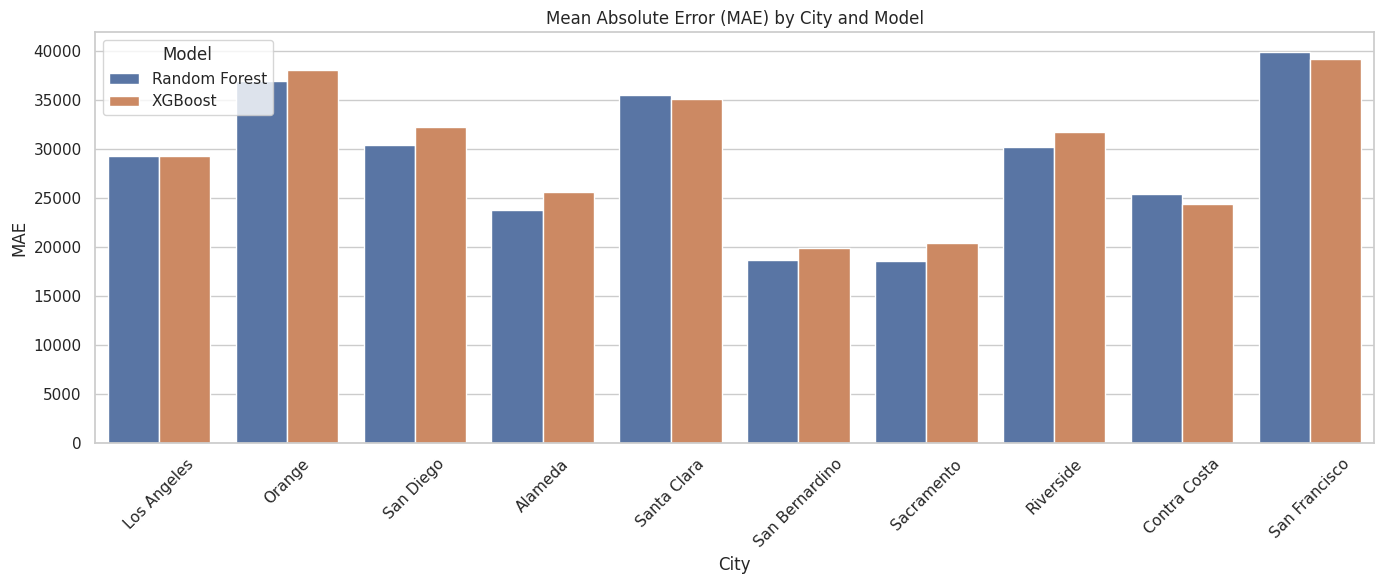

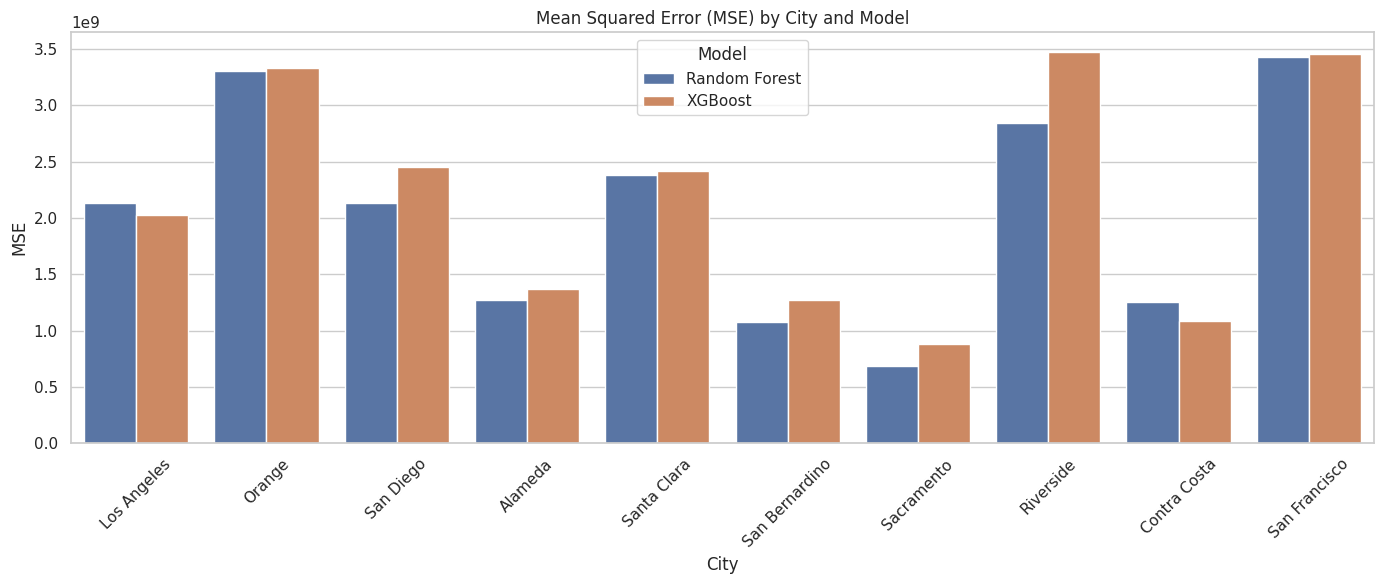

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# -------- R² Score Plot --------
plt.figure(figsize=(14, 6))
sns.barplot(x='City', y='R2 Score', hue='Model', data=results_df)
plt.title('R² Score by City and Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("r2_scores_by_city_model.png")  # Save locally in Colab
plt.show()

# -------- MAE Plot --------
plt.figure(figsize=(14, 6))
sns.barplot(x='City', y='MAE', hue='Model', data=results_df)
plt.title('Mean Absolute Error (MAE) by City and Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("mae_by_city_model.png")
plt.show()

# -------- MSE Plot --------
plt.figure(figsize=(14, 6))
sns.barplot(x='City', y='MSE', hue='Model', data=results_df)
plt.title('Mean Squared Error (MSE) by City and Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("mse_by_city_model.png")
plt.show()

In [20]:
from google.colab import files

files.download("r2_scores_by_city_model.png")
files.download("mae_by_city_model.png")
files.download("mse_by_city_model.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>